# 6.2 Стекинг

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
#?tqdm

Разберём стекинг на практике, проанализировав датасет, описывающий параметры, которые были сняты со спутника при фотографировании Земли. У нас есть 54 переменные. Для упрощения будем рассматривать два типа поверхностей —так мы сводим нашу задачу к задаче бинарной классификации. 

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', sep=',', header=None)[:10000]

In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
9995,2845,77,15,201,86,1507,238,212,101,1451,...,0,1,0,0,0,0,0,0,0,5
9996,2828,74,18,150,68,1556,239,203,89,1460,...,0,1,0,0,0,0,0,0,0,5
9997,3245,309,16,150,57,150,173,227,194,1557,...,0,0,0,0,0,0,0,0,0,1
9998,3245,33,12,335,46,430,218,214,131,1298,...,0,0,0,0,0,0,0,0,0,1
9999,3098,37,22,467,174,2294,214,187,99,2290,...,0,1,0,0,0,0,0,0,0,1


In [5]:
df.shape

(10000, 55)

In [6]:
df[54].value_counts().sort_index()

1    1375
2    1462
3    1262
4    1620
5    1583
6    1349
7    1349
Name: 54, dtype: int64

In [7]:
features = list(range(0, 54))
target = 54

# для упрощения, будем рассотривать только 2 класса, т.е. сделаем задачу бинарной классификации
df = df[(df[target] == 1) | (df[target] == 2)]

In [8]:
df.shape

(2837, 55)

In [82]:
cover_train, cover_test= train_test_split(df, test_size=0.5)

cover_X_train, cover_y_train = cover_train[features], cover_train[target]
cover_X_test, cover_y_test = cover_test[features], cover_test[target]

In [10]:
cover_train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
5735,2995,328,7,182,12,1767,203,232,168,3462,...,0,0,0,0,0,0,0,0,0,1
9202,2828,66,22,30,14,1020,235,190,75,313,...,1,0,0,0,0,0,0,0,0,2
498,2867,143,12,437,114,3363,237,237,129,2963,...,0,0,0,0,0,0,0,0,0,2
2356,2809,118,5,335,86,1224,228,236,142,595,...,1,0,0,0,0,0,0,0,0,2
9125,3135,349,18,134,29,3796,184,207,160,3272,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2995,173,15,268,135,6312,228,246,146,4135,...,0,0,0,0,0,0,0,0,0,2
9014,3053,14,8,60,0,3419,213,224,148,2794,...,0,0,0,0,0,0,0,0,0,1
1917,2822,347,24,228,50,1560,168,195,160,1645,...,0,0,0,0,0,0,0,0,0,2
539,2760,62,5,547,66,1842,224,230,142,2079,...,0,0,0,0,0,0,0,0,0,2


In [11]:
cover_X_train[0]

5735    2995
9202    2828
498     2867
2356    2809
9125    3135
        ... 
191     2995
9014    3053
1917    2822
539     2760
583     2917
Name: 0, Length: 1418, dtype: int64

In [12]:
cover_y_train

5735    1
9202    2
498     2
2356    2
9125    1
       ..
191     2
9014    1
1917    2
539     2
583     2
Name: 54, Length: 1418, dtype: int64

In [13]:
cover_X_train.shape, cover_X_test.shape

((1418, 54), (1419, 54))

In [83]:
scaler = StandardScaler()
cover_X_train = scaler.fit_transform(cover_X_train)
cover_X_test = scaler.transform(cover_X_test)

In [19]:
cover_X_train

array([[-0.08617916,  1.49205479, -0.87440502, ..., -0.14449336,
        -0.11960833, -0.11338934],
       [-0.92964859, -0.79521544,  1.37234477, ..., -0.14449336,
        -0.11960833, -0.11338934],
       [-0.7326707 , -0.12300243, -0.12548842, ..., -0.14449336,
        -0.11960833, -0.11338934],
       ...,
       [-0.95995288,  1.65792553,  1.6719114 , ..., -0.14449336,
        -0.11960833, -0.11338934],
       [-1.27309722, -0.8301356 , -1.17397165, ..., -0.14449336,
        -0.11960833, -0.11338934],
       [-0.48013494, -0.43728384, -1.17397165, ..., -0.14449336,
        -0.11960833, -0.11338934]])

In [15]:
cover_X_train[0]

array([-0.08617916,  1.49205479, -0.87440502, -0.44848352, -0.57356362,
       -0.49062791, -0.42112711,  0.42161147,  0.69158581,  1.00124337,
        0.86762965, -0.14449336, -0.82226695, -0.07532436,  0.        ,
        0.        ,  0.        , -0.07992189,  0.        , -0.05318698,
        0.        , -0.02656532, -0.0375823 , -0.1165381 , -0.1101553 ,
       -0.27692859, -0.1165381 ,  0.        ,  0.        , -0.06518659,
       -0.04604499, -0.07992189, -0.07532436, -0.16594045, -0.05318698,
       -0.25409558,  2.80401498, -0.231283  ,  0.        , -0.07043451,
       -0.0375823 ,  0.        , -0.56377643, -0.25722639, -0.23962436,
       -0.37765979, -0.27247463, -0.02656532,  0.        , -0.02656532,
        0.        , -0.14449336, -0.11960833, -0.11338934])

<AxesSubplot:>

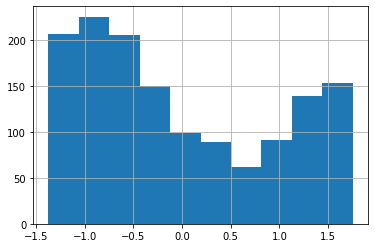

In [17]:
pd.DataFrame(cover_X_test)[1].hist()

<AxesSubplot:>

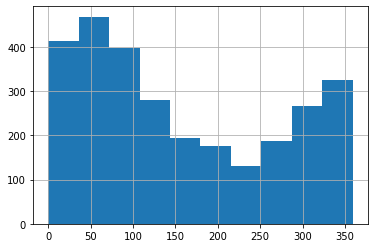

In [18]:
df[1].hist()

Stacking — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle.  
Подход использует понятие _базовых классификаторов_, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также _мета-классификатора_, использующего предсказания базовых классификаторов как признаки.

Для избежания переобучения будем разбивать обучающую выборку на фолды.  
Например, фолды при разбиении на три части:  
``==*``  
``=*=``  
``*==``  

Это требуется для того, чтобы получить новые признаки (ответы алгоритмов на первом уровне) на всей обучающей выборке, т.е. ответы алгоритма на тех объектах, которые не были использованы во время обучения. В примере выше мы будем использовать ответы алгоритма, полученные на объектах звездочках. _Важно_: на каждом фолде мы обучаем алгоритм заново.

In [20]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """
    Computes meta-features using the classifier.
    
    :arg clf: scikit-learn classifier
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    X_meta_train = np.zeros_like(y_train, dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)[:, 1]
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)[:, 1]
    
    return X_meta_train, X_meta_test

In [32]:
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    """
    Gererates metafeatures using a list of classifires.
    
    :arg classifiers: list of scikit-learn classifiers
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.vstack([X_meta_train for X_meta_train, X_meta_test in features]).T
    stacked_features_test = np.vstack([X_meta_test for X_meta_train, X_meta_test in features]).T
    
    return stacked_features_train, stacked_features_test

In [ ]:
''' ORIGINAL CODE
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    """
    Generates metafeatures using a list of classifiers.
    
    :arg classifiers: list of scikit-learn classifiers
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.vstack([
        features_train for features_train, features_test in features
    ]).T

    stacked_features_test = np.vstack([
        features_test for features_train, features_test in features
    ]).T
    
    return stacked_features_train, stacked_features_test
    '''

In [84]:
np.random.seed(42)
clf = GradientBoostingClassifier(n_estimators=300)
clf.fit(cover_X_train, cover_y_train)

accuracy_score(clf.predict(cover_X_test), cover_y_test)

0.7963354474982381

In [85]:
cv = KFold(n_splits=10, shuffle=True)

stacked_features_train, stacked_features_test = generate_meta_features([
    LogisticRegression(C=0.001, penalty='l1', solver='liblinear', max_iter=5000),
    LogisticRegression(C=0.001, penalty='l2', solver='liblinear', max_iter=5000),  
    RandomForestClassifier(n_estimators=300, n_jobs=-1),
    GradientBoostingClassifier(n_estimators=300)
], cover_X_train, cover_X_test, cover_y_train.values, cv)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.93s/it]


In [86]:
total_features_train = np.hstack([cover_X_train, stacked_features_train])
total_features_test = np.hstack([cover_X_test, stacked_features_test])

In [87]:
cover_X_train.shape, stacked_features_train.shape, total_features_train.shape

((1418, 54), (1418, 4), (1418, 58))

In [88]:
def simple_predict(classifiers, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    for clf in tqdm(classifiers):
        clf.fit(X_train, y_train)
        print(clf, accuracy_score(clf.predict(X_test), y_test))

In [89]:
classifiers = [
    GradientBoostingClassifier(n_estimators=300),
    LogisticRegression(penalty='none', solver='lbfgs'),
    LogisticRegression(penalty='none', solver='lbfgs', max_iter=200),
    RandomForestClassifier(n_estimators=300)
]
simple_predict(classifiers, cover_X_train, cover_y_train, cover_X_test, cover_y_test)

 25%|█████████████████████                                                               | 1/4 [00:01<00:03,  1.04s/it]

GradientBoostingClassifier(n_estimators=300) 0.7963354474982381
LogisticRegression(penalty='none') 0.7751937984496124
LogisticRegression(max_iter=200, penalty='none') 0.7751937984496124


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.12it/s]

RandomForestClassifier(n_estimators=300) 0.8033826638477801


In [90]:
np.random.seed(42)
clf = LogisticRegression(penalty='none', solver='lbfgs')
clf.fit(stacked_features_train, cover_y_train)
accuracy_score(clf.predict(stacked_features_test), cover_y_test)

0.8040873854827343

In [91]:
np.random.seed(42)
clf = LogisticRegression(penalty='none', solver='lbfgs', max_iter=200)
clf.fit(total_features_train, cover_y_train)
accuracy_score(clf.predict(total_features_test), cover_y_test)

0.7935165609584214

In [92]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

In [117]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [118]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора.
    Они являются вероятностями классов при решении задачи многоклассовой классификации.
    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)
    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)

    X_meta_test = X_meta_test/cv.n_splits

    return X_meta_train, X_meta_test

In [119]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [120]:
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

In [121]:
def compute_metric(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

In [122]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [123]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

classifiers = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', multi_class='ovr', max_iter=2000),
    LogisticRegression(penalty='l2', C=0.001, solver='saga', multi_class='multinomial', max_iter=2000),
    RandomForestClassifier(n_estimators=300),
    GradientBoostingClassifier(n_estimators=200)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:41<00:00, 40.26s/it]


0.98339

In [125]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=200)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.41s/it]


0.981296

In [126]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

classifiers = [
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=300)    
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.48s/it]


0.987798

In [127]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

classifiers = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', multi_class='ovr', max_iter=2000),
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=300),
    AdaBoostClassifier()
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:44<00:00, 11.06s/it]


0.987798

In [130]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train, y_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [131]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.25s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:14<00:00,  7.36s/it]


0.982131

In [132]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = LogisticRegression(multi_class='auto', solver='lbfgs')
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result



  0%|                                                                                            | 0/4 [26:46<?, ?it/s]


 50%|██████████████████████████████████████████                                          | 1/2 [00:15<00:15, 15.77s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:28<00:00, 14.32s/it]


0.981183

In [150]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = RandomForestClassifier()
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.85s/it]


0.984925

In [151]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = KNeighborsClassifier()
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.86s/it]


0.98762

In [135]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = GradientBoostingClassifier()
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.89s/it]


0.986659

In [137]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

classifiers = [
    RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=24),
    ExtraTreesClassifier(n_estimators=300)
]

features_train, features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

np.random.seed(42)
clf = ExtraTreesClassifier(n_estimators=100)
result = compute_metric(clf, X_train=features_train, y_train=y_train, X_test=features_test, y_test=y_test)
result

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.51s/it]


0.982528

In [149]:
clf = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=24)
clf.fit(X_train, y_train)
prediction1 = clf.predict_proba(X_test)
clf = ExtraTreesClassifier(n_estimators=300)
clf.fit(X_train, y_train)
prediction2 = clf.predict_proba(X_test)
clf = LogisticRegression()
clf.fit(X_train, y_train)
prediction3 = clf.predict_proba(X_test)

answer = (prediction1 + prediction2 + prediction3).argmax(axis = 1)

np.round(f1_score(y_test, answer, average='macro'), 6)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.976259